In [ ]:
def cot(x):
    return cos(x) / sin(x)



def flteq(x, y):
    return abs(x - y) < full(x.size, 1e-15)


from matplotlib.pyplot import *
from numpy import *
from numpy.random import dirichlet, seed, uniform
from scipy.stats import chi2

In [1]:
# Mia Celeste helped me with vectorizing these functions and all of the hellish jank that entailed
def geta0(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        + cos(theta) * cos(thetaprime)
        + r * (cos(theta) + cos(thetaprime))
        + sqrt(1 - r**2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta1(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        - cos(theta) * cos(thetaprime)
        + r * (cos(theta) - cos(thetaprime))
        - sqrt(1 - r**2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta2(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        - cos(theta) * cos(thetaprime)
        - r * (cos(theta) - cos(thetaprime))
        - sqrt(1 - r**2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta3(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        + cos(theta) * cos(thetaprime)
        - r * (cos(theta) + cos(thetaprime))
        + sqrt(1 - r**2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


@errstate(all="ignore")
def getphi0(theta, thetaprime, r, zeta):
    length = theta.size
    return where(
        flteq(zeta, zeros(length))
        | flteq(r, ones(length))
        | flteq(theta, zeros(length))
        | flteq(thetaprime, zeros(length)),
        zeros(length),
        arctan2(
            sin(zeta),
            cos(zeta) + sqrt((1 + r) / (1 - r)) * cot(theta / 2) * cot(thetaprime / 2),
        ),
    )


@errstate(all="ignore")
def getphi1(theta, thetaprime, r, zeta, psiprime):
    length = theta.size
    return (
        where(
            flteq(zeta, full(length, pi))
            | flteq(r, ones(length))
            | flteq(theta, zeros(length))
            | flteq(thetaprime, full(length, pi)),
            zeros(length),
            psiprime
            + arctan2(
                -sin(zeta),
                -cos(zeta) + sqrt((1 + r) / (1 - r)) * cot(theta / 2) * tan(theta / 2),
            ),
        )
        - geta0(theta, thetaprime, r, zeta)
    ) % (2 * pi)


@errstate(all="ignore")
def getphi2(theta, thetaprime, r, zeta, psi):
    length = theta.size
    return (
        where(
            flteq(zeta, full(length, pi))
            | flteq(r, ones(length))
            | flteq(theta, full(length, pi))
            | flteq(thetaprime, zeros(length)),
            zeros(length),
            psi
            + arctan2(
                -sin(zeta),
                -cos(zeta)
                + sqrt((1 + r) / (1 - r)) * tan(theta / 2) * cot(thetaprime / 2),
            ),
        )
        - geta0(theta, thetaprime, r, zeta)
    ) % (2 * pi)


@errstate(all="ignore")
def getphi3(theta, thetaprime, r, zeta, psi, psiprime):
    length = theta.size
    return (
        where(
            flteq(zeta, zeros(length))
            | flteq(r, ones(length))
            | flteq(theta, full(length, pi))
            | flteq(thetaprime, full(length, pi)),
            zeros(length),
            psi
            + psiprime
            + arctan2(
                sin(zeta),
                cos(zeta)
                + sqrt((1 + r) / (1 - r)) * tan(theta / 2) * tan(thetaprime / 2),
            ),
        )
        - geta0(theta, thetaprime, r, zeta)
    ) % (2 * pi)


def getaphi(theta, thetaprime, r, zeta, psi, psiprime):
    return (
        geta0(theta, thetaprime, r, zeta),
        geta1(theta, thetaprime, r, zeta),
        geta2(theta, thetaprime, r, zeta),
        geta3(theta, thetaprime, r, zeta),
        getphi1(theta, thetaprime, r, zeta, psiprime),
        getphi2(theta, thetaprime, r, zeta, psi),
        getphi3(theta, thetaprime, r, zeta, psi, psiprime),
    )

NameError: name 'errstate' is not defined

In [127]:
def sampleaphi(samps):
    theta = arccos(uniform(-1, 1, samps))
    psi = uniform(0, 2 * pi, samps)
    thetaprime = arccos(uniform(-1, 1, samps))
    psiprime = uniform(0, 2 * pi, samps)
    #r = cos(uniform(0,pi/2,samps))
    #r = sqrt(uniform(0, 0.25, samps))+0.5
    #r = uniform(0.525,1,samps)
    #r = cbrt(uniform(0, 1, samps))
    #r = cos(uniform(-pi/2,pi/2,samps))
    #chi = arccos(uniform(1/sqrt(2),1,samps))
    chi = arccos(uniform(0,1/sqrt(2),samps))
    r = cos(2*chi)
    # ur = uniform(0,1,samps)
    # r = 1-2*(2-sqrt(2))*ur+(3-2*sqrt(2))*ur**2
    #r = uniform(0,1,samps)
    zeta = uniform(0, 2 * pi, samps)
    return getaphi(theta, thetaprime, r, zeta, psi, psiprime)

In [9]:
# a0arr,a1arr,a2arr,a3arr,p1arr,p2arr,p3arr = sampleaphi(9372)
# hist(p3arr,bins=500);

In [10]:
# adf = 4
# pdf = 3

# achisql = []
# pchisql = []
# aptel = []
# pptel = []

# for i in arange(10000):
#     a0, a1, a2, a3, p1, p2, p3 = sampleaphi(1000)

#     asem = std(array([a0, a1, a2, a3]) ** 2, axis=1) / sqrt(a0.length)
#     psem = std(array([p1, p2, p3]), axis=1) / sqrt(p1.length)

#     ma = mean(array([a0, a1, a2, a3]) ** 2, axis=1)
#     achisq = sum(((ma - 0.25) / asem) ** 2)

#     mp = mean(array([p1, p2, p3]), axis=1)
#     pchisq = sum(((mp - pi) / psem) ** 2)

#     achisql.append(achisq)
#     pchisql.append(pchisq)

#     aptel.append(1 - chi2.cdf(achisq, df=adf))
#     pptel.append(1 - chi2.cdf(pchisq, df=pdf))

In [130]:
a0, a1, a2, a3, p1, p2, p3 = sampleaphi(1000000)

#hist(a3**2, bins=linspace(0, 1, 1000))
#mean(a3**2), std(a3**2), sqrt(0.25 * 0.75 / 5)

# hist(p2, bins=linspace(0, 2 * pi, 1000))
# mean(p2), std(p2), 2 * pi / sqrt(12)

# mean((1-r)/2)
# r = 2*dirichlet((1,1), 1000000)-1
# r = uniform(0,1,1000000)
# hist((1-r)/2,bins=1000);
# hist((1-abs(r))/2,bins=1000);
# plot(abs(r+1)/2,abs(r-1)/2,'o',markerlength=1);
# the variance is smaller than a true random simplex sampling: ~0.186 vs. ~0.193
# noticeable difference in concavity until ~0.6

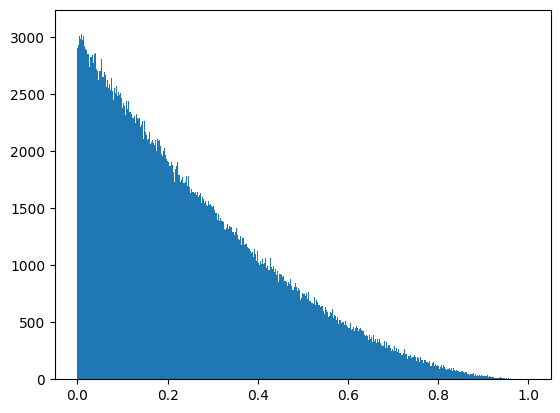

In [9]:
hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0, 1, 1000));

In [31]:
def varsamps(n,samps):
    theta = arccos(uniform(-1, 1, samps))
    psi = uniform(0, 2 * pi, samps)
    thetaprime = arccos(uniform(-1, 1, samps))
    psiprime = uniform(0, 2 * pi, samps)
    r = (uniform(0, 1, samps))**(1/n)
    zeta = uniform(0, 2 * pi, samps)
    return getaphi(theta, thetaprime, r, zeta, psi, psiprime)

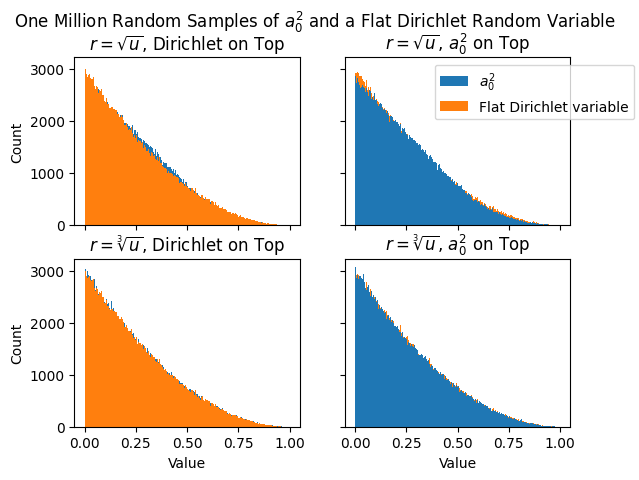

In [70]:
a0_1, _, _, _, _, _, _ = varsamps(2, 1000000)
a0_2, _, _, _, _, _, _ = varsamps(3, 1000000)

dir = dirichlet(ones(4), 1000000)[:, 0]

fig, ((ax1, ax2), (ax3, ax4)) = subplots(2,2)

#rcParams['text.usetex'] = False
fig.suptitle('One Million Random Samples of $a_0^2$ and a Flat Dirichlet Random Variable')

for ax in fig.get_axes():
    ax.set(xlabel='Value', ylabel='Count')
    ax.label_outer()

ax1.hist(a0_1**2, bins=linspace(0, 1, 1000), label='$a_0^2$', color='tab:blue')
ax1.hist(dir, bins=linspace(0, 1, 1000),label='Flat Dirichlet variable', color='tab:orange')
ax1.set_title('$r=\sqrt{u}$, Dirichlet on Top')

ax2.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax2.hist(a0_1**2, bins=linspace(0, 1, 1000), color='tab:blue')
ax2.set_title('$r=\sqrt{u}$, $a_0^2$ on Top')

ax3.hist(a0_2**2, bins=linspace(0, 1, 1000), color='tab:blue')
ax3.hist(dir, bins=linspace(0, 1, 1000),color='tab:orange')
ax3.set_title('$r=\sqrt[3]{u}$, Dirichlet on Top')

ax4.hist(dir, bins=linspace(0, 1, 1000),color='tab:orange')
ax4.hist(a0_2**2, bins=linspace(0, 1, 1000), color='tab:blue')
ax4.set_title('$r=\sqrt[3]{u}$, $a_0^2$ on Top')

fig.legend(loc=(.68,.75));

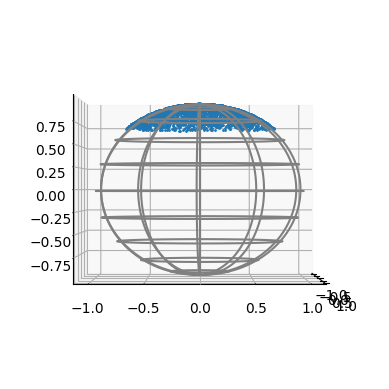

In [124]:
samps =2500
theta = arccos(uniform(-1, 1, samps))
psi = uniform(0, 2 * pi, samps)
thetaprime = arccos(uniform(-1, 1, samps))
psiprime = uniform(0, 2 * pi, samps)
#r = cos(uniform(0,pi/2,samps))
#r = sqrt(uniform(0, 0.25, samps))+0.5
#r = uniform(0.525,1,samps)
#r = cbrt(uniform(0, 1, samps))
#r = cos(uniform(-pi/2,pi/2,samps))
chi = arccos(uniform(1/sqrt(2),1,samps))
#chi = arccos(uniform(0,1/sqrt(2),samps))
r = cos(2*chi)
# ur = uniform(0,1,samps)
# r = 1-2*(2-sqrt(2))*ur+(3-2*sqrt(2))*ur**2
#r = uniform(0,1,samps)
zeta = uniform(0, 2 * pi, samps)

from matplotlib.pyplot import draw, pause
from mpl_toolkits import mplot3d

# # mean(r), std(r)
# # mean(zeta * r**2), std(zeta * r**2)
# # fig, ax = subplots(subplot_kw={'projection':'polar'})
# # ax.plot(zeta, r, 'o', markerlength=1) #looks good!

ax = axes(projection="3d")
X, Y, Z = (
    sin(chi) * cos(zeta),
    sin(chi) * sin(zeta),
    cos(chi),
)
stheta = linspace(0,pi,100)
sphi = linspace(0,2*pi,100)
# sx, sy, sz = (0.99*outer(cos(sphi),sin(stheta)),
#               0.99*outer(sin(sphi),sin(stheta)),
#               0.99*outer(ones(sphi.size),cos(stheta)))
sx, sy, sz = (0.99*outer(cos(sphi),sin(stheta)),
              0.99*outer(sin(sphi),sin(stheta)),
              0.99*outer(ones(sphi.size),cos(stheta)))
ax.plot3D(X, Y, Z, "o", markersize=1)
ax.plot_wireframe(sx,sy,sz,color='grey',rstride=10, cstride=10)
ax.view_init(0, 0)
draw();
# hist(hist0-hist1, bins=1000);

# hist0, bins0, range0 = hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0,1,1000));
# hist(hist0 - hist1,bins=500, range=(0,1));